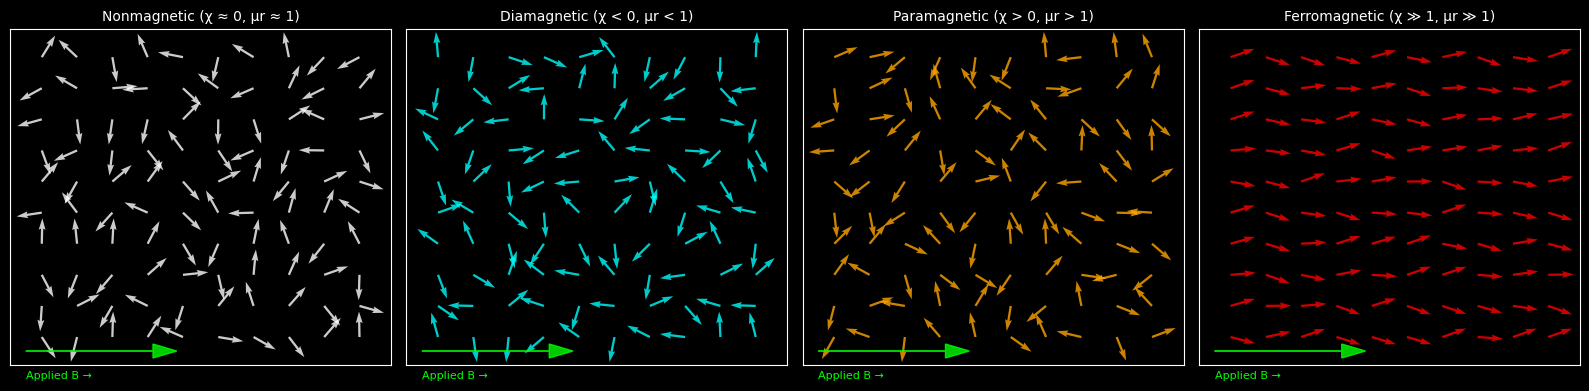

In [1]:
# 🧲 Magnetic Behavior Visualization (Static)
# Google Colab ready — No animation, no extra installs

import numpy as np
import matplotlib.pyplot as plt

# Grid of dipoles
x, y = np.meshgrid(np.linspace(-1, 1, 10), np.linspace(-1, 1, 10))

# External magnetic field (to the right)
B_ext = np.array([1, 0])

# Magnetic susceptibilities for each material
materials = {
    "Nonmagnetic (χ ≈ 0, μr ≈ 1)": 0.0,
    "Diamagnetic (χ < 0, μr < 1)": -0.2,
    "Paramagnetic (χ > 0, μr > 1)": 0.2,
    "Ferromagnetic (χ ≫ 1, μr ≫ 1)": 3.0
}

# Set up plot
fig, axes = plt.subplots(1, 4, figsize=(16, 4), facecolor="black")

for ax, (title, chi) in zip(axes, materials.items()):
    ax.set_title(title, color="white", fontsize=10)
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_facecolor("black")
    for spine in ax.spines.values():
        spine.set_color("white")

    # Base random orientation of magnetic moments
    theta0 = np.random.uniform(-np.pi, np.pi, x.shape)
    Mx = np.cos(theta0)
    My = np.sin(theta0)

    # Effect of external field (alignment based on χ)
    align_factor = chi / (1 + abs(chi))  # bounded influence
    Mx = (1 - abs(align_factor)) * Mx + align_factor * B_ext[0]
    My = (1 - abs(align_factor)) * My + align_factor * B_ext[1]

    # Normalize
    mag = np.sqrt(Mx**2 + My**2)
    Mx, My = Mx/mag, My/mag

    # Choose colors
    color = "white" if chi == 0 else ("cyan" if chi < 0 else ("orange" if chi < 1 else "red"))

    # Draw the dipoles
    ax.quiver(x, y, Mx, My, color=color, scale=15, headwidth=3, alpha=0.8)

    # Show applied magnetic field
    ax.arrow(-1.1, -1.1, 0.8, 0, color="lime", head_width=0.1, alpha=0.8)
    ax.text(-1.1, -1.3, "Applied B →", color="lime", fontsize=8)

plt.tight_layout()
plt.show()
